## # Prediction using Supervised ML (Logistic Regression)

## Create a simple Logistic Regression model capable of detecting fraud in credit card operations

In [75]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')



In [9]:
## Load the dataset
data = pd.read_csv('D:\Project files\creditcard fraud detection\creditcard.csv',header =0)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset contain:
###### It contains 284807 rows of data and 31 columns.
##### The most important columns are Time, Amount, Class (Fraud or Not Fraud)
###### data[Class] = 0 Not a fraud transaction
###### data[Class] = 1 fraud transaction    

In [13]:
## Analysing The Dataset:
print('Dimension of dataset:{}'.format(data.shape))
print('Descriptive Analysis:\n{}'.format(data.describe()))

Dimension of dataset:(284807, 31)
Descriptive Analysis:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.

In [14]:
## Verification of the existence of null or missing values
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
print('Schema of the dataset:\n',data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Percentage of total not fraud transaction (normal transactions)

In [37]:
nfcount=0
notFraud= data['Class']
for i in range(len(notFraud)):
    if notFraud[i] ==0:
        nfcount = nfcount + 1

nfcount
per_nf= nfcount/len(notFraud)*100
print('percentage of total not fraud transation in the dataset:',per_nf)

percentage of total not fraud transation in the dataset: 99.82725143693798


In [25]:
data['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

#### Comparing the amount value of normal transactions versus fraud

normal transactions %  99.827
Fraud %     0.173


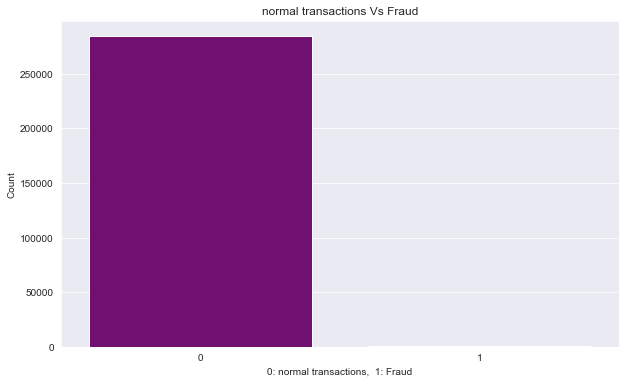

In [51]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.barplot(x=data['Class'].value_counts().index,y=data['Class'].value_counts(), palette=["Purple"])
plt.title('normal transactions Vs Fraud')
plt.ylabel('Count')
plt.xlabel('0: normal transactions,  1: Fraud')
print ('normal transactions % ',round(data['Class'].value_counts()[0]/len(data)*100,3))
print ('Fraud %    ',round(data['Class'].value_counts()[1]/len(data)*100,3));

###### As per the graph we can say the ratio of normal transactions are higher than fraud transactions.

Text(0.5, 1.0, 'Time Vs Amount')

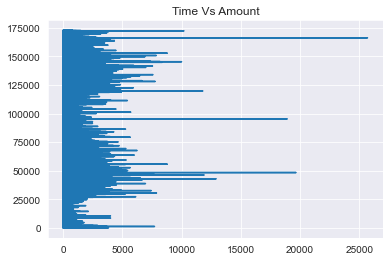

In [52]:
## Relation between Time and Amount
x = data['Amount']
y = data['Time']
plt.plot(x,y)
plt.title('Time Vs Amount')

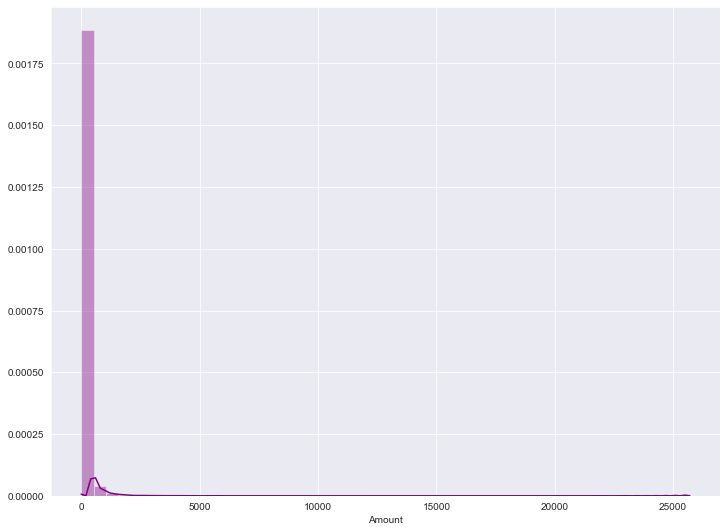

In [57]:
## Distribution of Amount variable
plt.figure(figsize = (12,9),)
sns.distplot(data['Amount'],color = 'purple')

###### From this plot the amount distribution curve is shown that number of high amount transations are very low. So there is a high probability for huge transactions to be fraudulent.

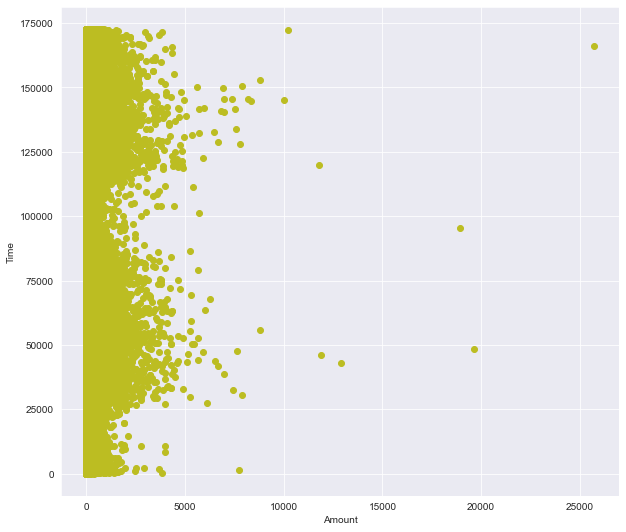

In [67]:
## Outliers
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data['Amount'], data['Time'],color = 'C8')
ax.set_xlabel("Amount")
ax.set_ylabel("Time")
plt.show()

In [68]:
##  Split this data into training and test sets:
x = data.drop(['Class'], axis = 1) 
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =0)


In [69]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


In [78]:
### Training the Model
logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train)

LogisticRegression()

In [80]:
y_pred = logisticreg.predict(x_test)
accuracy = logisticreg.score(x_test, y_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of the logistc regression model:',accuracy*100, '%')

Accuracy score of the logistc regression model: 99.89115550718023 %
